<a href="https://colab.research.google.com/github/seungmin-son/ML_Practice/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5%EB%A1%A0_5%EC%A3%BC%EC%B0%A8%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#필요한 라이브러리 선언 & 데이터셋 통합

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.plotting import scatterplotmatrix

In [82]:
red_wine = pd.read_csv('/content/winequality-red.csv', sep=';');
white_wine = pd.read_csv('/content/winequality-white.csv', sep=';');

In [83]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [84]:
red_wine.shape, white_wine.shape

((1599, 12), (4898, 12))

In [85]:
red_wine['color'] =1
white_wine['color'] = 0

In [86]:
red_wine.shape, white_wine.shape

((1599, 13), (4898, 13))

In [87]:
wine = pd.concat([red_wine,white_wine])
wine.shape

(6497, 13)

## EDA & 데이터 시각화

In [88]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9])

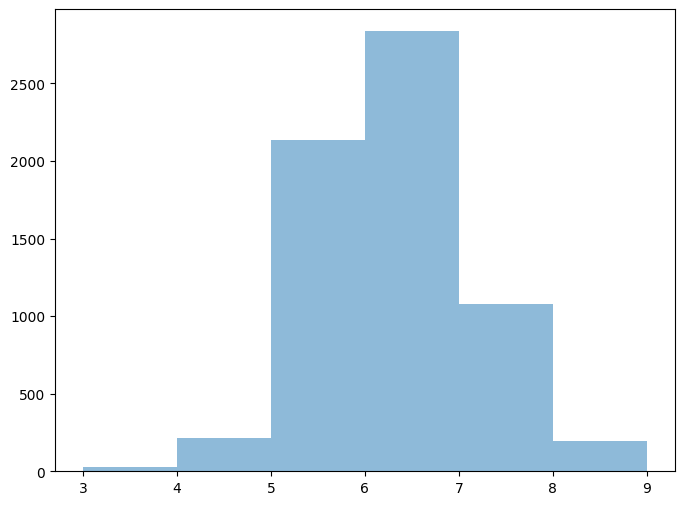

In [89]:
#와인 quality 확인
plt.figure(figsize=(8,6))
plt.hist(wine['quality'], bins=6, alpha=0.5)
plt.show()

#6등급의 품질이 가장 많음

In [90]:
wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

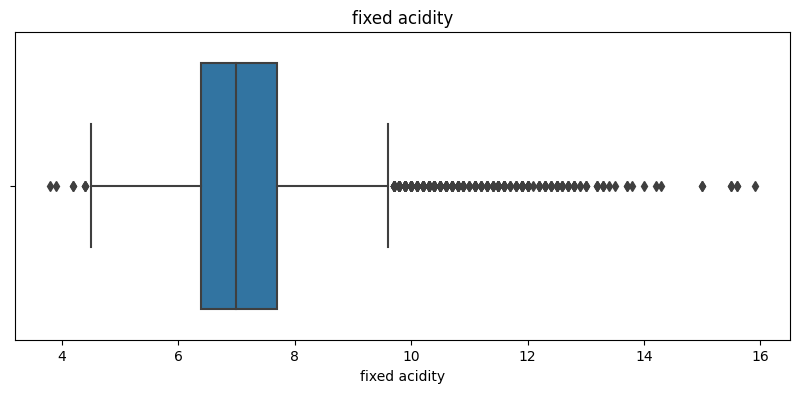

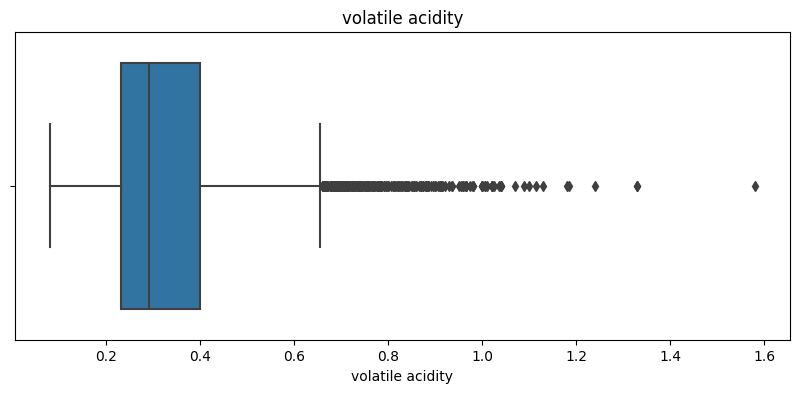

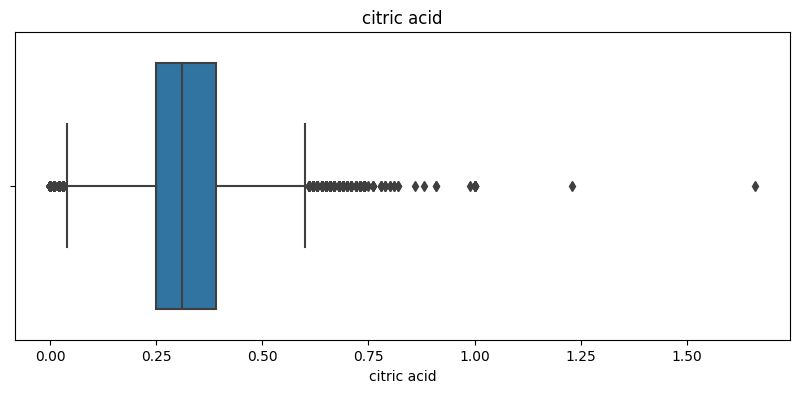

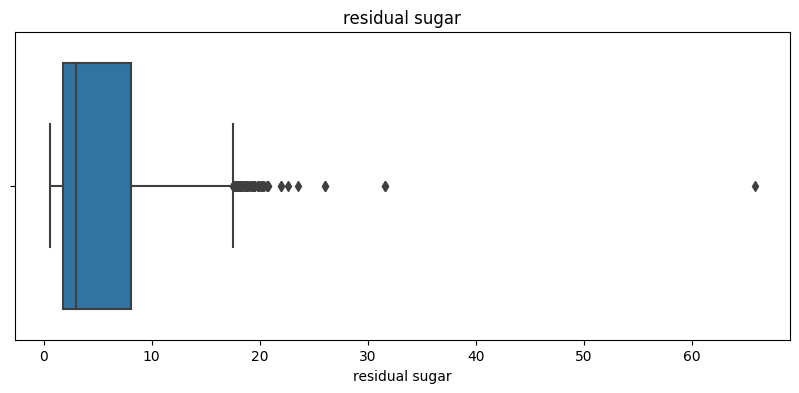

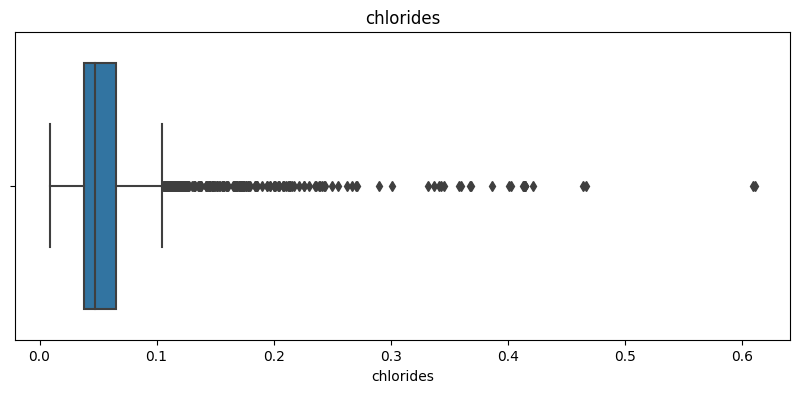

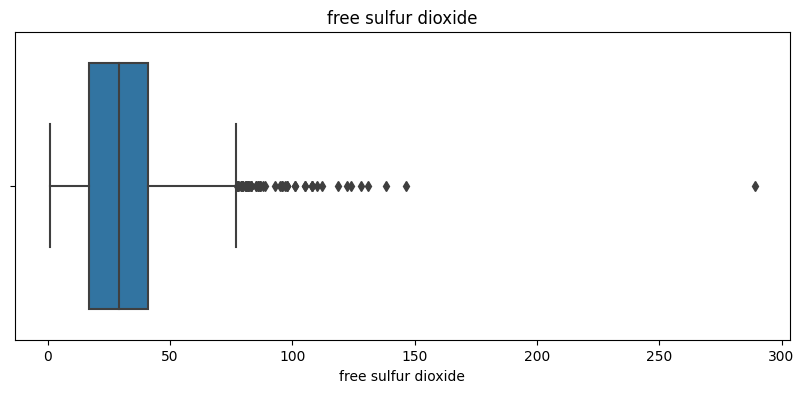

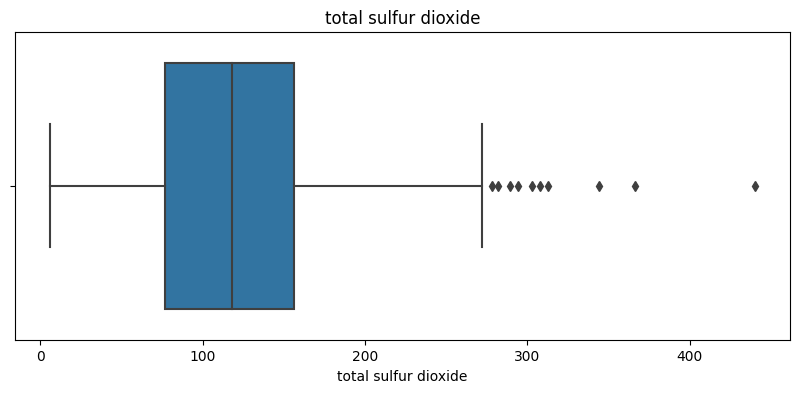

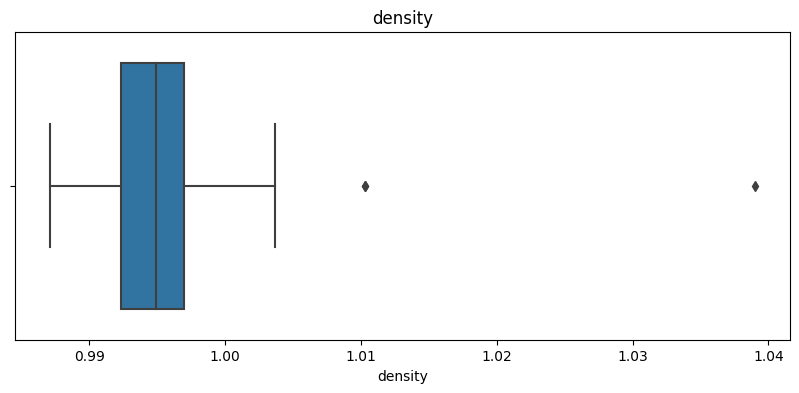

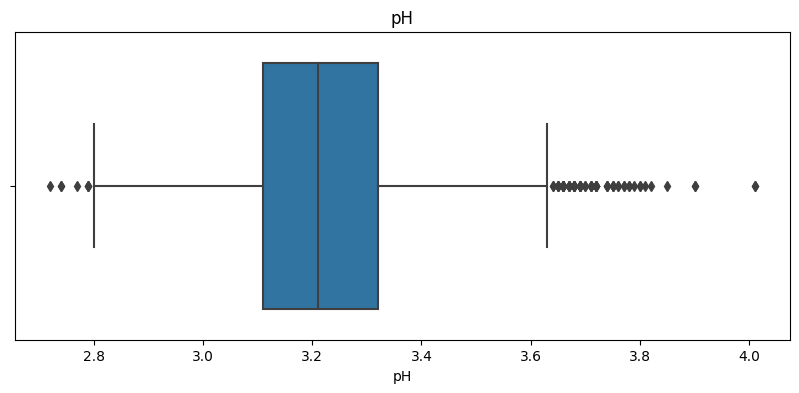

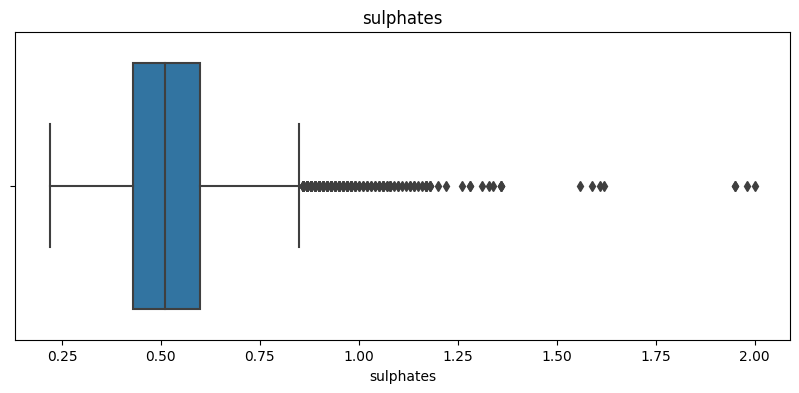

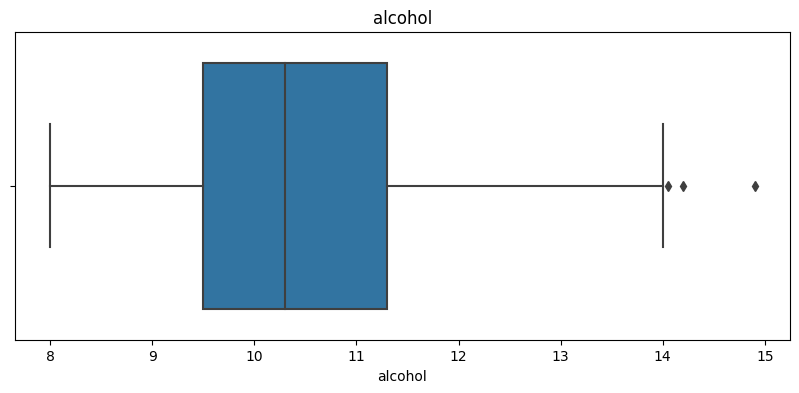

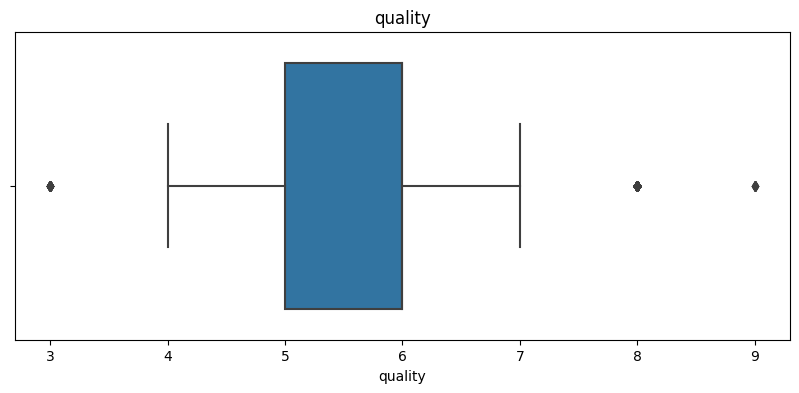

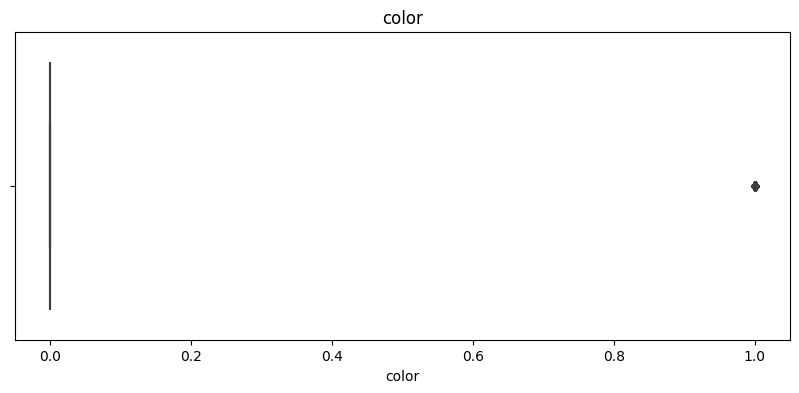

In [91]:
features = wine.select_dtypes(include=['float64', 'int64']).columns

# 각 특성에 대해 Boxplot
for feature in features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=wine[feature])
    plt.title(feature)
    plt.show()


# 각 특성에 대한 크기와 평균이 다름

## 데이터 전처리

In [92]:
y = wine['color']
X = wine.drop(['color'], axis= 1)
X.shape

(6497, 12)

### 표준화  & 정규화 적용

In [93]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

MMS = MinMaxScaler()
SS = StandardScaler()


MMS.fit(X)
SS.fit(X)

X_mms = MMS.transform(X)
X_ss = SS.transform(X)

### 데이터셋 분리

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,
                                                 random_state = 13)

In [95]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([3913, 1284]))

In [96]:
X_ss_pd = pd.DataFrame(X_ss, columns=X.columns)
X_mms_pd = pd.DataFrame(X_mms,columns=X.columns)

## 모델 학습

### MinMaxSacler + Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_out = X_mms_pd

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_out,y,test_size= 0.2,
                                                 random_state = 13)


log_reg  = LogisticRegression(random_state=13, solver='liblinear', C=10.)
log_reg.fit(X_train,y_train)

pred = log_reg.predict(X_test)
accuracy_score(y_test,pred)

0.9884615384615385

### StandardScaler + LogisticRegression

In [98]:
X_out = X_ss_pd

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_out,y,test_size= 0.2,
                                                 random_state = 13)


log_reg  = LogisticRegression(random_state=13, solver='liblinear', C=10.)
log_reg.fit(X_train,y_train)

pred = log_reg.predict(X_test)
accuracy_score(y_test,pred)

0.9969230769230769

## 각 경우에 대한 성능 비교

In [99]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix

scalers = [None, StandardScaler(), MinMaxScaler()]
scaler_names = ['Sacler X', 'Standard Scaler', 'MinMax Scaler']

C_values = [0.0001, 0.1, 1., 10., 100., 1000.]

for scaler_name, scaler in zip(scaler_names, scalers):
    if scaler is not None:
        X_out = scaler.fit_transform(X)
    else:
        X_out = X

    X_train,X_test,y_train,y_test = train_test_split(X_out,y,test_size=0.2,
                                                     random_state=13)

    for c_value in C_values:
        log_reg = LogisticRegression(random_state=13,solver='liblinear', C=c_value)
        log_reg.fit(X_train,y_train)

        pred = log_reg.predict(X_test)
        accuracy = accuracy_score(y_test,pred)

        print(f'--- {scaler_name}, C={c_value} ---')
        print(f'Accuracy: {accuracy}')

        cm = confusion_matrix(y_test,pred)
        print('Confusion Matrix:')
        print(cm)
        print('\n')


--- Sacler X, C=0.0001 ---
Accuracy: 0.933076923076923
Confusion Matrix:
[[974  11]
 [ 76 239]]


--- Sacler X, C=0.1 ---
Accuracy: 0.9730769230769231
Confusion Matrix:
[[973  12]
 [ 23 292]]


--- Sacler X, C=1.0 ---
Accuracy: 0.9838461538461538
Confusion Matrix:
[[978   7]
 [ 14 301]]


--- Sacler X, C=10.0 ---
Accuracy: 0.9876923076923076
Confusion Matrix:
[[980   5]
 [ 11 304]]


--- Sacler X, C=100.0 ---
Accuracy: 0.9884615384615385
Confusion Matrix:
[[979   6]
 [  9 306]]


--- Sacler X, C=1000.0 ---
Accuracy: 0.99
Confusion Matrix:
[[981   4]
 [  9 306]]


--- Standard Scaler, C=0.0001 ---
Accuracy: 0.9653846153846154
Confusion Matrix:
[[941  44]
 [  1 314]]


--- Standard Scaler, C=0.1 ---
Accuracy: 0.9930769230769231
Confusion Matrix:
[[978   7]
 [  2 313]]


--- Standard Scaler, C=1.0 ---
Accuracy: 0.9953846153846154
Confusion Matrix:
[[980   5]
 [  1 314]]


--- Standard Scaler, C=10.0 ---
Accuracy: 0.9969230769230769
Confusion Matrix:
[[982   3]
 [  1 314]]


--- Standard S

## 중요한 피쳐 확인

In [100]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2, random_state=13)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

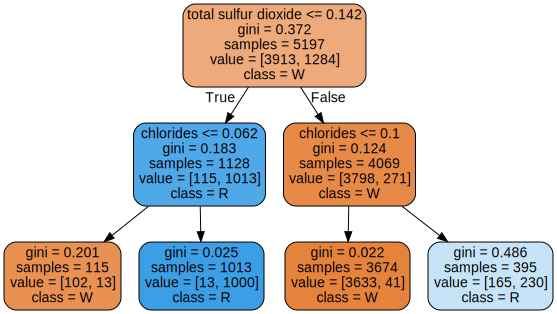

In [101]:
from graphviz import Source
from sklearn.tree import export_graphviz

Source(export_graphviz(tree, feature_names= X.columns, class_names=['W','R'], rounded=True, filled=True))